In [1]:
#the dataset is sales data of a company comparing slaes before and after marketing.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
oo = pd.read_csv('C:/Users/HARIKRISHNAN M/Downloads/Sales_add.csv')
oo.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [5]:
oo.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [6]:
oo.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [7]:
oo.isna().sum()
#to check null values

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

# Checking whether the company made profit or loss after opting for digital marketing

In [8]:
m1=oo['Sales_before_digital_add(in $)'].mean()
m1
#checking average sales over 22 months period before digital marketing

149239.95454545456

In [9]:
m2=oo['Sales_After_digital_add(in $)'].mean()
m2
#checking avg sales after dig marketting

231123.72727272726

In [10]:
if (m2-m1)/m1 > 0:
    print('Profit',(m2-m1)/m1*100)
else:
    print('Loss',(m2-m1)/m1*100)
#printing the output as either profit or loss along with the percentage value

Profit 54.86719221851081


# The company has made a profit of 54.86% on average

In [32]:
Profit = (oo['Sales_After_digital_add(in $)'] - oo['Sales_before_digital_add(in $)'])/(oo['Sales_before_digital_add(in $)'])*100
Profit
#calculating profit percentage for each month and generating a series

0     103.421581
1      49.328359
2      66.971793
3      52.337892
4      61.982134
5      87.330403
6      70.033301
7      75.870825
8      32.116268
9      36.475387
10     27.511155
11     54.398426
12     41.442969
13     67.067730
14     55.521046
15      5.705579
16     66.764635
17     14.000929
18     71.824271
19     39.402464
20     78.658979
21     86.561034
dtype: float64

In [34]:
oo['profit_percentage'] = pd.Series(Profit)
oo.head()
#appending the dataset with profit percentage data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $),profit_percentage
0,Month-1,Region - A,Manager - A,132921,270390,103.421581
1,Month-2,Region - A,Manager - C,149559,223334,49.328359
2,Month-3,Region - B,Manager - A,146278,244243,66.971793
3,Month-4,Region - B,Manager - B,152167,231808,52.337892
4,Month-5,Region - C,Manager - B,159525,258402,61.982134


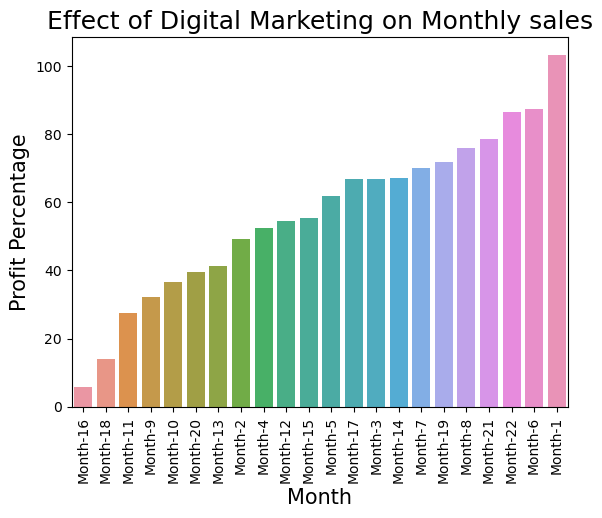

In [116]:
p = sns.barplot(x='Month',y='profit_percentage',data=oo,order=oo.sort_values('profit_percentage').Month)
plt.xlabel("Month", size=15)
plt.ylabel("Profit Percentage", size=15)
plt.xticks(rotation = 90)
plt.title("Effect of Digital Marketing on Monthly sales", size=18)
plt.show()
#monthly profit percentage plotted against each month highlighting the profits made in each month

# Clearly, the plot shows that company has made huge profits by employing digital marketing.
# It is to be noted that more than double sales have been observed in Month-1 (first month after digital marketing was opted) 

# Checking dependencies between Region and Manager

In [ ]:
#Hypothesis
#Ho: There is no dependency between Region and Manager
#Ha: There is dependency between both these variables
#assuming of level of significance as 0.05

In [43]:
oo.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)', 'profit_percentage'],
      dtype='object')

In [47]:
oo.groupby(['Region','Manager']).agg({'Region':['count']})
#Grouping Region and Manager columns

Region
                        count
Region     Manager           
Region - A Manager - A      4
           Manager - B      3
           Manager - C      3
Region - B Manager - A      4
           Manager - B      1
           Manager - C      2
Region - C Manager - A      1
           Manager - B      3
           Manager - C      1

In [48]:
dep=oo.groupby(['Region','Manager']).size().unstack('Region',fill_value = 0)
dep
#Using unstack to get a clear representation and making it a seperate table

Region,Region - A,Region - B,Region - C
Manager,,,
Manager - A,4,4,1
Manager - B,3,1,3
Manager - C,3,2,1


In [69]:
p1=dep.sum()
p1
#calculating row totals

Region
Region - A    10
Region - B     7
Region - C     5
dtype: int64

In [79]:
p1.index

Index(['Region - A', 'Region - B', 'Region - C'], dtype='object', name='Region')

In [70]:
p2=dep.sum(axis=1)
p2
#calculating column totals

Manager
Manager - A    9
Manager - B    7
Manager - C    6
dtype: int64

In [89]:
from scipy.stats import chi2_contingency
#importing library to perform chi square test of independence

In [90]:
chi2_contingency(dep)
#here the values are chi-stats(3.05), p-val(0.549),deg. of freedom(4) and expected value(array)

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 2.86363636, 2.04545455],
        [3.18181818, 2.22727273, 1.59090909],
        [2.72727273, 1.90909091, 1.36363636]]))

In [93]:
chival,pval,dof,array = chi2_contingency(dep)
pval

0.5493991051158094

In [94]:
print(pval)
if pval<=0.05:
    print("reject Ho")
else:
    print("accept Ho")
#checking if the pval is less than level of significance

0.5493991051158094
accept Ho


# Hence, we need to accept the null hypothesis that there is no dependency between both the variables.